In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def setup_files(path):

    files = [os.path.join(path, i) for i in os.listdir(path)]
    folders = ['CV', 'lith', 'delith', 'EIS']
    cycles = ['C1', 'C2', 'C3', 'C4', 'C5']

    for i in folders:
        if not os.path.exists(os.path.join(path, i)):
            os.mkdir(os.path.join(path, i))

    if not os.path.exists(os.path.join(path, 'EIS', 'Relaxis')):
        os.mkdir(os.path.join(path, 'EIS', 'Relaxis'))
        
    for i in cycles:
        if not os.path.exists(os.path.join(path, 'EIS', 'Relaxis', i)):
            os.mkdir(os.path.join(path, 'EIS', 'Relaxis', i))
        if not os.path.exists(os.path.join(path, 'lith', i)):
            os.mkdir(os.path.join(path, 'lith', i))
        if not os.path.exists(os.path.join(path, 'delith', i)):
            os.mkdir(os.path.join(path, 'delith', i))
        
    for i in os.listdir(path):
        if 'EIS_' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'EIS', i))
    for i in os.listdir(os.path.join(path, 'EIS')):
        if 'relaxis' in i:
            os.rename(os.path.join(path, 'EIS', i), os.path.join(path, 'EIS', 'Relaxis', i))


    for i in os.listdir(os.path.join(path, 'EIS', 'Relaxis')):  
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C3', i))
        elif i[-6:-5] == '3':
                os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C5', i))
        elif i[-5:] == 's.txt':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C1', i))
    
    for i in os.listdir(path):
        if '_lith_' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'lith', i))
        elif '_delith' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'delith', i))
        elif i != 'README.txt' and len(i) > 7:
            os.rename(os.path.join(path, i), os.path.join(path, 'CV', i))
       
    for i in os.listdir(os.path.join(path, 'lith')):
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C3', i))
        elif i[-6:-5] == '3':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C5', i))
        elif len(i) > 3:
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C1', i))
    
    for i in os.listdir(os.path.join(path, 'delith')):
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C3', i))
        elif i[-6:-5] == '3':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C5', i))
        elif len(i) > 3:
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C1', i))

def cc(path, area, thickness):

    cv_path = os.path.join(path, 'CV')
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')
    cv_df = pd.DataFrame()
    for i in os.listdir(cv_path):
        f = os.path.join(cv_path, i)
        df = pd.read_csv(f, sep = ';')
        if '_Initial_' in i:
            df['CV'] = 'Initial'
        else:
            df['CV'] = 'Final'
        cv_df = pd.concat([cv_df, df], ignore_index=True)
        
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')

    cycles = ['C1', 'C2', 'C3', 'C4', 'C5']

    lithiation = pd.DataFrame()
    delithiation = pd.DataFrame()
    capacity_l = pd.DataFrame(columns = ['Capacity', 'Cycle', 'L/D'])
    capacity_d = pd.DataFrame(columns = ['Capacity', 'Cycle', 'L/D'])
    efficiency = pd.DataFrame()
    n = 1
    for i in cycles:
        l = os.path.join(lith_path, i)
        for j in os.listdir(l):
            f = os.path.join(lith_path, i, j)
            df = pd.read_csv(f, sep = ';')
            df['Set'] = i[-1]
            df['Cycle'] =  n #str(n) ### string or int
            df['Capacity_calc'] = -df['WE(1).Charge (C)'] /3.6 / (area * 1e-7 * thickness)
            lithiation = pd.concat([lithiation, df], ignore_index=True)
            capacity_l.loc[n] = (max(df['Capacity_calc']), n, 'Lithiation')
            
            n += 1

    n = 1
    for i in cycles:
        d = os.path.join(delith_path, i)
        for j in os.listdir(d):
            f = os.path.join(delith_path, i, j)
            df = pd.read_csv(f, sep = ';')
            df['Set'] = i[-1]
            df['Cycle'] =  n
            df['Capacity_calc'] = df['WE(1).Charge (C)'] /3.6 / (area * 1e-7 * thickness)
            delithiation = pd.concat([delithiation, df], ignore_index=True)
            capacity_d.loc[n] = (max(df['Capacity_calc']), n, 'Delithiation')
            n += 1
    capacity = pd.concat([capacity_l, capacity_d], ignore_index=True)
    efficiency['Efficiency'] = capacity_l['Capacity'] / capacity_d['Capacity'] * 100
    efficiency['Cycle'] = pd.Series(np.arange(0,26,1))

    
    return cv_df, lithiation, delithiation, capacity, efficiency

def eis(path, potentials):
    
    names = ['Potential vs Li/Li$^+$']
    col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
    
    files = [os.path.join(path, i) for i in os.listdir(path)]
    eis_data = pd.DataFrame()
    spectra = pd.DataFrame()

    n = 1 #Run
    k = 1 #Run for spectra
    for i in files:
        m = 1 #potential
       
        for j in os.listdir(i):
            
            if 'Fit' in j:
                fit_path = os.path.join(i, j)
                df = pd.read_csv(fit_path, sep = '\t', skiprows = 2)
                df = df.rename(columns={'FreeVariable' : names[0], 
                                        'Resistance 1: value' : 'Electrolyte Resistance ($\Omega$)', 
                                        'Resistance 2: value' : 'Charge transfer Resistance ($\Omega$)' })
                df['Run'] = n
                eis_data = pd.concat([eis_data, df])
                n += 1
                
            if 'Spectra' in j:
                spectra_path = os.path.join(i, j)
                df_s = pd.read_csv(spectra_path, skiprows=4, sep = '\t', names=col)

                df_s[col[2]] = -df_s[col[2]]
                df_s[col[5]] = -df_s[col[5]]
                df_s[names[0]] = potentials[m - 1]
                df_s['Run'] = k
                spectra = pd.concat([spectra, df_s])
                m += 1
        k += 1
    return eis_data, spectra


In [ ]:
# ============== CC NAPt =======================================================
sample = 'NA Pt'
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Set2\NA_01'
setup_files(path)
cv, l, d, c, e = cc(path, 0.785, 80)
results = [cv, l, d, c, e]
for i in results:
    i['Sample'] = sample
palette = 'cividis_r'
# sns.set_palette()
fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
sns.lineplot(data = l, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
sns.lineplot(data = d, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
sns.scatterplot(data = c, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
sns.scatterplot(data = e, x = 'Cycle', y = 'Efficiency', ax = ax[2])
sns.scatterplot(data = cv, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

plt.suptitle('LMO on Non-Annealed Pt')
ax[1].set_ylim(300, 600)
ax[2].set_ylim(70, 100)


In [ ]:
# ============== EIS NAPt =======================================================
sample = 'NA Pt'
palette = 'cividis_r'
p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Set2\NA_01\EIS\Relaxis'
pot = [str(round(i, 2))  for i in np. arange(3.9, 4.2, 0.05)]
eis_data, spectra = eis(p, pot)
eis_data['Sample'] = sample
spectra['Sample'] = sample
filter = eis_data[eis_data['Potential vs Li/Li$^+$'] == 4.]
filter_s = spectra[spectra['Potential vs Li/Li$^+$'] == '4.0']

# ================= Plot ===========================

fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

sns.barplot(data = eis_data, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
sns.barplot(data = eis_data, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
sns.scatterplot(data = spectra, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
sns.scatterplot(data = filter_s, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
sns.lineplot(data = filter_s, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# ============== Plot Settings =====================

# ax[0,0].legend_.remove()
ax[0,1].legend_.remove()
ax[1,0].legend_.remove()
ax[1,0].set_xlim(100,600)
ax[1,0].set_ylim(-10,300)
ax[1,1].set_title('4.0 V')
plt.suptitle('LMO on Non-Annealed Pt')

In [ ]:
# ============== CC APt =======================================================
sample = 'A Pt'
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Set2\A_01'
setup_files(path)
cv_a, l_a, d_a, c_a, e_a = cc(path, 0.785, 80)
results_a = [cv_a, l_a, d_a, c_a, e_a]
for i in results_a:
    i['Sample'] = sample
palette = 'cividis_r'
# sns.set_palette()
fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
sns.lineplot(data = l_a, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
sns.lineplot(data = d_a, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
sns.scatterplot(data = c_a, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
sns.scatterplot(data = e_a, x = 'Cycle', y = 'Efficiency', ax = ax[2])
sns.scatterplot(data = cv_a, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

plt.suptitle('LMO on Annealed Pt')
ax[1].set_ylim(300, 600)
ax[2].set_ylim(70, 100)

In [ ]:
# ============== EIS APt =======================================================
palette = 'cividis_r'
sample = 'A Pt'
p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Set2\A_01\EIS\Relaxis'
pot = [str(round(i, 2))  for i in np. arange(3.9, 4.2, 0.05)]
eis_data_a, spectra_a = eis(p, pot)
eis_data_a['Sample'] = sample
spectra_a['Sample'] = sample
filter_a = eis_data_a[eis_data_a['Potential vs Li/Li$^+$'] == 4.]
filter_s_a = spectra_a[spectra_a['Potential vs Li/Li$^+$'] == '4.0']

# ================= Plot ===========================

fig, ax = plt.subplots(2,2, dpi = 100, figsize = (15,12))

sns.barplot(data = eis_data, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
sns.barplot(data = eis_data, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 2: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
sns.scatterplot(data = spectra, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
sns.scatterplot(data = filter_s, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
sns.lineplot(data = filter_s, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# ============== Plot Settings =====================

# ax[0,0].legend_.remove()
ax[0,1].legend_.remove()
# ax[1,0].legend(ncols = 2) #_.remove()
ax[1,0].set_xlim(100,600)
ax[1,0].set_ylim(-10,300)
ax[1,1].set_title('4.0 V')
plt.suptitle('LMO Annealed Pt')

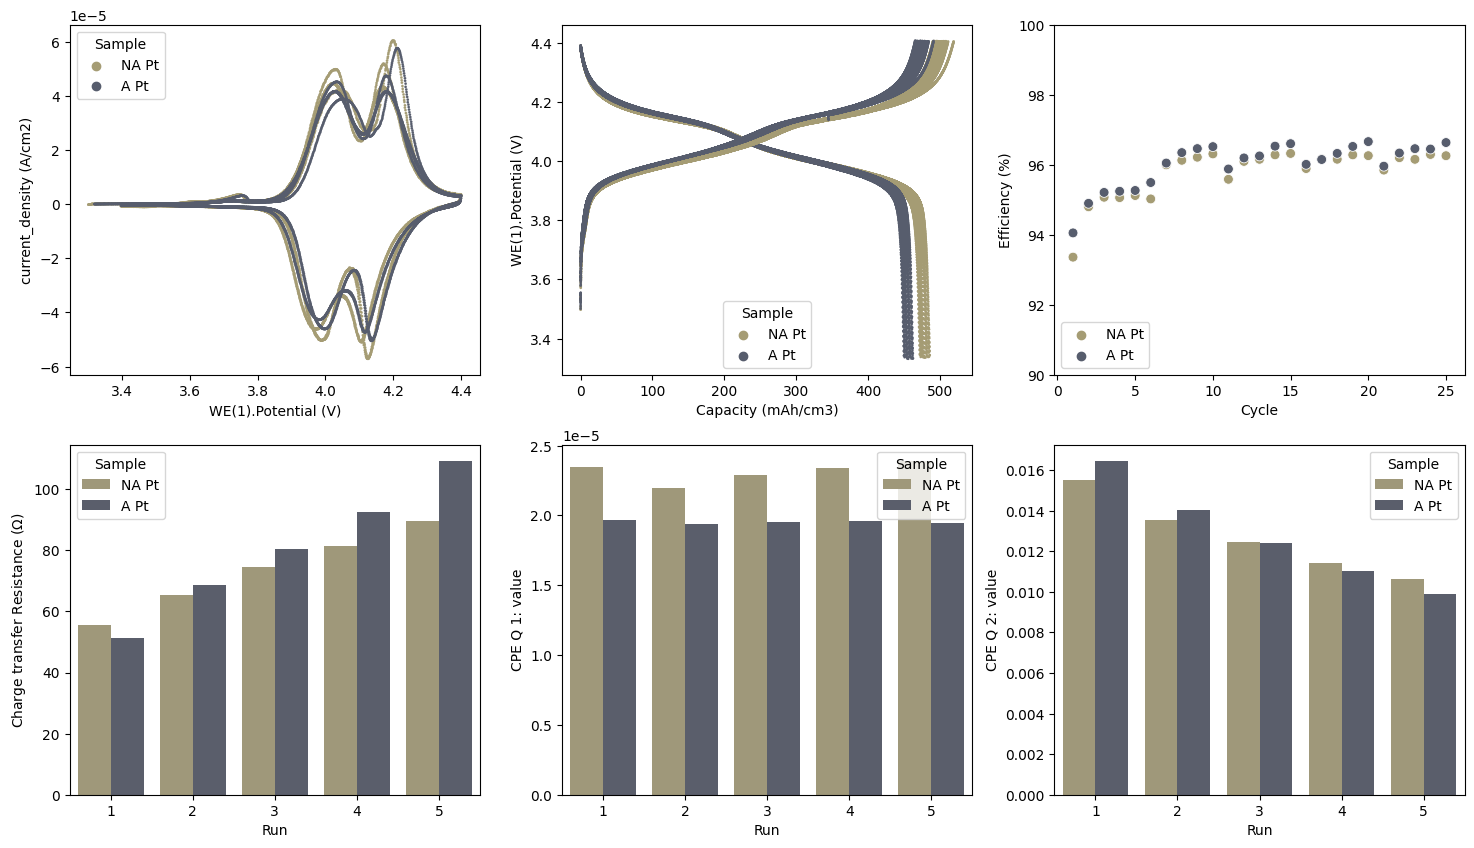

In [10]:
# Comparison
cvs = [cv, cv_a]
lith = [l, l_a]
delith = [d, d_a]
cap = [c, c_a]
eff = [e, e_a]

cv_df = pd.concat(cvs, ignore_index=True)
lith_df = pd.concat(lith, ignore_index=True)
delith_df = pd.concat(delith, ignore_index=True)
cap_df = pd.concat(cap, ignore_index=True)
eff_df = pd.concat(eff, ignore_index=True)
compare_4v = pd.concat([filter, filter_a], ignore_index=True) # EIS values from NA Pt and A Pt
compare_spectra = pd.concat([filter_s, filter_s_a])#), ignore_index=True)

# ================== PLOT =========================
fig, ax = plt.subplots(2,3, dpi = 100, figsize = (18,10))
sns.scatterplot(data = cv_df, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'Sample', edgecolor = None, palette=palette, s = 3, ax = ax[0,0])
sns.scatterplot(data = lith_df, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Sample', ax = ax[0,1], palette= palette, edgecolor = None, s = 3)
sns.scatterplot(data = delith_df, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Sample', ax = ax[0,1], palette= palette, edgecolor = None, s = 3, legend  = False)
sns.scatterplot(data = eff_df, x = 'Cycle', y = 'Efficiency', hue = 'Sample', ax = ax[0,2], palette=palette, s = 50)
# sns.scatterplot(data = compare_spectra, x = "Z'", y = "-Z''", hue = 'Sample', style = 'Run', palette=palette, edgecolor = None, ax = ax[1,0])
# sns.lineplot(data = compare_spectra, x = "Fit Z'", y = "Fit -Z''", hue = 'Sample', style = 'Run', legend = False, palette=palette, ax = ax[1,0])
sns.barplot(data = compare_4v, x = 'Run', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Sample', palette = palette, ax = ax[1,0])
sns.barplot(data = compare_4v, x = 'Run', y = 'CPE Q 1: value', hue = 'Sample', palette = palette, ax = ax[1,1])
sns.barplot(data = compare_4v, x = 'Run', y = 'CPE Q 2: value', hue = 'Sample', palette = palette, ax = ax[1,2])

# Settings
ax[0,2].set_ylim(90,100)
ax[0,2].legend(loc = 3)
ax[0,2].set_ylabel('Efficiency (%)')

In [ ]:
eis_data